**importing the dependencies**

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Collection and Analysis
PIMA Diabetes Dataset

In [6]:
# loading the diabetes dataset to a pandas DataFrame
file_path = "/content/drive/My Drive/diabetes.csv"  # Update with your actual path
diabetes_dataset = pd.read_csv(file_path)



In [7]:
# pritning the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#Check the no of row and col
diabetes_dataset.shape

(768, 9)

In [10]:
# getting the statsitical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [13]:
# check for diabetic and non diabetic paitent
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0---> non-diabetic
1--->diabetic

In [14]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [15]:
# seperating data and labels
X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']


In [17]:
# print the X and y
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [19]:
scaler=StandardScaler()

In [20]:
standardized_data=scaler.fit_transform(X)

In [21]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
X=standardized_data
Y=diabetes_dataset['Outcome']

In [23]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [24]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Spilting data into training and testing

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [26]:
 print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model

In [27]:
classifier=svm.SVC(kernel='linear')

classifier is our model variable

In [28]:
# training the support vector machine classifier
classifier.fit(X_train,Y_train)


SVC(kernel='linear')

Model Evaluation   

Accuracy Score

In [30]:
# accuracy score on the training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)


In [31]:
print("Accuracy score of the training data :",training_data_accuracy)

Accuracy score of the training data : 0.7866449511400652


In [33]:
# accuracy score on the test data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [62]:
print("Accuracy score of the test data :",test_data_accuracy)


Accuracy score of the test data : 0.7727272727272727


Making a predictive system   

checking for data   
2,197,70,45,543,30.5,0.158,53,1

here last col is outcome 1 means diabetic




In [52]:
input_data=(2,197,70,45,543,30.5,0.158,53) # outcome is 1

# chaning the input data to numpy array
input_data_as_numpy=np.asarray(input_data)

input_data_as_numpy.shape
# here our data in 1d array which make our predictive system confusion to


(8,)

When making a prediction on a single instance, the model expects the input to be a 2D array (number of samples, number of features) instead of a 1D array.  

- new_data is originally a 1D array ([3, 5, 7] → shape (3,)).

- The model expects a 2D array ([[3, 5, 7]] → shape (1, 3), meaning 1 row, 3 columns).  

- reshape(1, -1) ensures that the data is correctly formatted for prediction.

In [53]:
# reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy.reshape(1,-1)

In [54]:
input_data_reshaped.shape
# now we see our data in 2d with 1 row and 8 col

(1, 8)

In [55]:
# standardized the input data

std_data=scaler.transform(input_data_reshaped)
print(std_data)

[[-0.54791859  2.38188392  0.04624525  1.53455054  4.02192191 -0.18943689
  -0.94794368  1.68125866]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
prediction= classifier.predict(std_data)
print(prediction) # it will give the outcome or predictive for the data

[1]


here our model have predicted 1 mean diabetic and it predict right

In [57]:
if(prediction[0]==0):
  print("The person is not diabetic")
else :
  print("The person is diabetic")

The person is diabetic


visualizing the test data prediction

In [64]:
print(X_test_prediction) # this is test data prediction by model in form of numpy array
Y_test_numpy = np.array(Y_test) # converting actual outcome dataFrame series to numpy array
print(Y_test_numpy)

[0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0]
[0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 0 0]


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:

# Count occurrences of 0 and 1 in actual and predicted
actual_counts = np.bincount(Y_test_numpy)
predicted_counts = np.bincount(X_test_prediction)

In [68]:
print(actual_counts)
print(predicted_counts)

[100  54]
[117  37]


In [69]:
# Create a DataFrame for visualization
df = pd.DataFrame({
    "Category": ["Non-Diabetic", "Diabetic"],
    "Actual": actual_counts,
    "Predicted": predicted_counts
})
print(df)

       Category  Actual  Predicted
0  Non-Diabetic     100        117
1      Diabetic      54         37


In [70]:
# Reshape DataFrame for seaborn barplot
df_melted = df.melt(id_vars="Category", var_name="Type", value_name="Count")
print(df_melted)

       Category       Type  Count
0  Non-Diabetic     Actual    100
1      Diabetic     Actual     54
2  Non-Diabetic  Predicted    117
3      Diabetic  Predicted     37


visualizing with bar graph

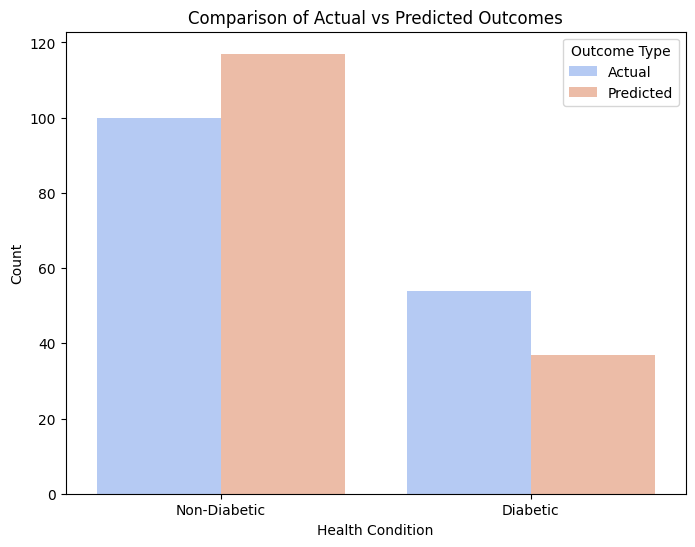

In [71]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x="Category", y="Count", hue="Type", data=df_melted, palette="coolwarm")

# Labels and title
plt.title("Comparison of Actual vs Predicted Outcomes")
plt.xlabel("Health Condition")
plt.ylabel("Count")
plt.legend(title="Outcome Type")

# Show plot
plt.show()